In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [22]:
data = pd.read_excel('Canada.xlsx',sheet_name='Canada by Citizenship',
    skiprows=range(20),    skipfooter=2)

#### Let's view the top 5 rows of the dataset using the head() function.

In [23]:
data.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


#### We can also view the bottom 5 rows of the dataset using the tail() function.

In [24]:
data.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


#### When analyzing a dataset, it's always a good idea to start by getting basic information about your dataframe. We can do this by using the info() method. This method can be used to get a short summary of the dataframe.

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
Type        195 non-null object
Coverage    195 non-null object
OdName      195 non-null object
AREA        195 non-null int64
AreaName    195 non-null object
REG         195 non-null int64
RegName     195 non-null object
DEV         195 non-null int64
DevName     195 non-null object
1980        195 non-null int64
1981        195 non-null int64
1982        195 non-null int64
1983        195 non-null int64
1984        195 non-null int64
1985        195 non-null int64
1986        195 non-null int64
1987        195 non-null int64
1988        195 non-null int64
1989        195 non-null int64
1990        195 non-null int64
1991        195 non-null int64
1992        195 non-null int64
1993        195 non-null int64
1994        195 non-null int64
1995        195 non-null int64
1996        195 non-null int64
1997        195 non-null int64
1998        195 non-null int64
1999        195 non-n

#### To get the list of column headers we can call upon the data frame's columns instance variable.

In [26]:
data.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

#### Similarly, to get the list of indices we use the .index instance variables.

In [27]:
data.index

RangeIndex(start=0, stop=195, step=1)

#### Note: The default type of intance variables index and columns are NOT list.

In [28]:
print(type(data.columns))
print(type(data.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


#### To get the index and columns as lists, we can use the tolist() method.

In [30]:
print(type(data.columns.tolist()))
print(type(data.index.tolist()))

<class 'list'>
<class 'list'>


#### To view the dimensions of the dataframe, we use the shape instance variable of it.

In [31]:
# size of dataframe (rows, columns)
data.shape    

(195, 43)

#### Note: The main types stored in pandas objects are float, int, bool, datetime64[ns], datetime64[ns, tz], timedelta[ns], category, and object (string). In addition, these dtypes have item sizes, e.g. int64 and int32.

#### Let's clean the data set to remove a few unnecessary columns. We can use pandas drop() method as follows:

In [32]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
data.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
data.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


#### Let's rename the columns so that they make sense. We can use rename() method by passing in a dictionary of old and new names as follows:



In [34]:
data.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
data.columns


Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

#### We will also add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013, as follows:



In [36]:
data['Total'] = data.sum(axis=1)


##### We can check to see how many null objects we have in the dataset as follows:



In [37]:
data.isnull().sum()


Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

#### Finally, let's view a quick summary of each column in our dataframe using the describe() method.


In [39]:
data.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


### Select Column

**There are two ways to filter on a column name:**

Method 1: Quick and easy, but only works if the column name does NOT have spaces or special characters.

```python
    df.column_name               # returns series
```

Method 2: More robust, and can filter on multiple columns.

```python
    df['column']                  # returns series
```

```python
    df[['column 1', 'column 2']]  # returns dataframe
```

***

#### Example: Let's try filtering on the list of countries ('Country').

In [43]:
data.Country  # returns a series

0                                            Afghanistan
1                                                Albania
2                                                Algeria
3                                         American Samoa
4                                                Andorra
5                                                 Angola
6                                    Antigua and Barbuda
7                                              Argentina
8                                                Armenia
9                                              Australia
10                                               Austria
11                                            Azerbaijan
12                                               Bahamas
13                                               Bahrain
14                                            Bangladesh
15                                              Barbados
16                                               Belarus
17                             

#### Let's try filtering on the list of countries ('Country') and the data for years: 1980 - 1985.

In [44]:
data[['Country', 1980, 1981, 1982, 1983, 1984, 1985]] # returns a dataframe
# notice that 'Country' is string, and the years are integers. 
# for the sake of consistency, we will convert all column names to string later on.

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
5,Angola,1,3,6,6,4,3
6,Antigua and Barbuda,0,0,0,0,42,52
7,Argentina,368,426,626,241,237,196
8,Armenia,0,0,0,0,0,0
9,Australia,702,639,484,317,317,319


### Select Row

There are main 2 ways to select rows:

```python
    df.loc[label]    # filters by the labels of the index/column
    df.iloc[index]   # filters by the positions of the index/column
```

Before we proceed, notice that the default index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country. For example to search for data on Japan, we need to know the corresponding index value.

This can be fixed very easily by setting the 'Country' column as the index using `set_index()` method.


In [47]:
data.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

In [49]:
data.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [51]:
# optional: to remove the name of the index
data.index.name = None

In [52]:
# 1. the full row data (all columns)
data.loc['Japan']

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [53]:
# alternate methods
data.iloc[87]

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [54]:
data[data.index == 'Japan']

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Japan,Asia,Eastern Asia,Developed regions,701,756,598,309,246,198,248,...,1067,1212,1250,1284,1194,1168,1265,1214,982,27707


In [55]:
# 2. for year 2013
data.loc['Japan', 2013]

982

In [56]:
# alternate method
# year 2013 is the last column, with a positional index of 36
data.iloc[87, 36]

982

In [57]:
# 3. for years 1980 to 1985
data.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]]

1980    701
1981    756
1982    598
1983    309
1984    246
1984    246
Name: Japan, dtype: object

In [58]:
# Alternative Method
data.iloc[87, [3, 4, 5, 6, 7, 8]]

1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object

Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index.

To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'.

In [59]:
data.columns = list(map(str, data.columns))
# [print (type(x)) for x in df_can.columns.values] #<-- uncomment to check type of column headers

In [60]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Filtering based on a criteria

To filter the dataframe based on a condition, we simply pass the condition as a boolean vector.

For example, Let's filter the dataframe to show the data on Asian countries (AreaName = Asia).

In [62]:
# 1. create the condition boolean series
condition = data['Continent'] == 'Asia'
print(condition)

Afghanistan                                              True
Albania                                                 False
Algeria                                                 False
American Samoa                                          False
Andorra                                                 False
Angola                                                  False
Antigua and Barbuda                                     False
Argentina                                               False
Armenia                                                  True
Australia                                               False
Austria                                                 False
Azerbaijan                                               True
Bahamas                                                 False
Bahrain                                                  True
Bangladesh                                               True
Barbados                                                False
Belarus 

In [63]:
# 2. pass this condition into the dataFrame
data[condition]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
"China, Hong Kong Special Administrative Region",Asia,Eastern Asia,Developing regions,0,0,0,0,0,0,0,...,729,712,674,897,657,623,591,728,774,9327


In [64]:
# we can pass multiple criteria in the same line.
# let's filter for AreaNAme = Asia and RegName = Southern Asia

data[(data['Continent']=='Asia') & (data['Region']=='Southern Asia')]

# note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
# don't forget to enclose the two conditions in parentheses

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


In [66]:
print('data dimensions:', data.shape)
print(data.columns)
data.head(2)

data dimensions: (195, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


***

# Visualizing Data using Matplotlib<a id="8"></a>

## Matplotlib: Standard Python Visualization Library<a id="10"></a>

The primary plotting library we will explore in the course is [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).  As mentioned on their website:

> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

If you are aspiring to create impactful visualization with python, Matplotlib is an essential tool to have at your disposal.

### Matplotlib.Pyplot

One of the core aspects of Matplotlib is `matplotlib.pyplot`. It is Matplotlib's scripting layer which we studied in details in the videos about Matplotlib. Recall that it is a collection of command style functions that make Matplotlib work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In this lab, we will work with the scripting layer to learn how to generate line plots. In future labs, we will get to work with the Artist layer as well to experiment first hand how it differs from the scripting layer.

In [67]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [68]:
print('Matplotlib version: ', mpl.__version__)  # >= 2.0.0

Matplotlib version:  3.0.3


In [69]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test', 'bright', 'cjk-jp-font', 'cjk-kr-font', 'cjk-sc-font', 'cjk-tc-font', 'grid', 'high-contrast', 'high-vis', 'ieee', 'light', 'muted', 'no-latex', 'notebook', 'pgf', 'retro', 'scatter', 'science', 'vibrant']


# Line Pots (Series/Dataframe) <a id="12"></a>

**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

**Let's start with a case study:**

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a `Line` plot:

**Question:** Plot a line graph of immigration from Haiti using `df.plot()`.


In [71]:
haiti = data.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

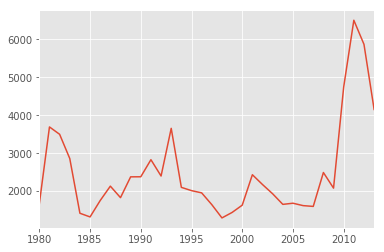

In [72]:
haiti.plot()

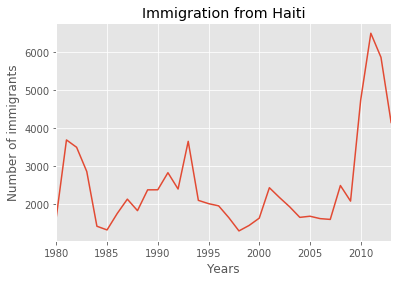

In [73]:
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

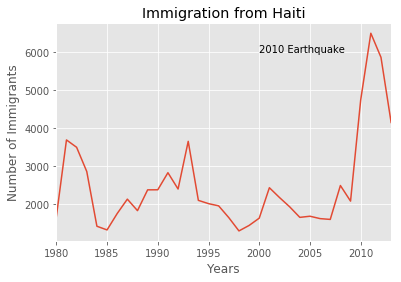

In [74]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below

plt.show() 

With just a few lines of code, you were able to quickly identify and visualize the spike in immigration!

Quick note on x and y values in `plt.text(x, y, label)`:

```
 Since the x-axis (years) is type 'integer', we specified x as a year. The y axis (number of immigrants) is type 'integer', so we can just specify the value y = 6000.
```

```python
    plt.text(2000, 6000, '2010 Earthquake') # years stored as type int
```

```
If the years were stored as type 'string', we would need to specify x as the index position of the year. Eg 20th index is year 2000 since it is the 20th year with a base year of 1980.
```

```python
    plt.text(20, 6000, '2010 Earthquake') # years stored as type int
```

```
We will cover advanced annotation methods in later modules.
```


We can easily add more countries to line plot to make meaningful comparisons immigration from different countries.

**Question:** Let's compare the number of immigrants from India and China from 1980 to 2013.


#### Step 1: Get the data set for China and India, and display the dataframe.

In [75]:
    df_CI = data.loc[['India', 'China'], years]
    df_CI

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


#### Step 2: Plot graph. We will explicitly specify line plot by passing in kind parameter to plot().

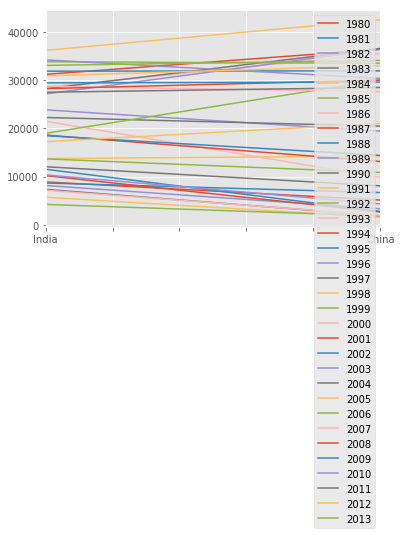

In [76]:
  df_CI.plot(kind='line')

That doesn't look right...

Recall that *pandas* plots the indices on the x-axis and the columns as individual lines on the y-axis. Since `df_CI` is a dataframe with the `country` as the index and `years` as the columns, we must first transpose the dataframe using `transpose()` method to swap the row and columns.


In [77]:
df_CI = df_CI.transpose()
df_CI.head()

,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


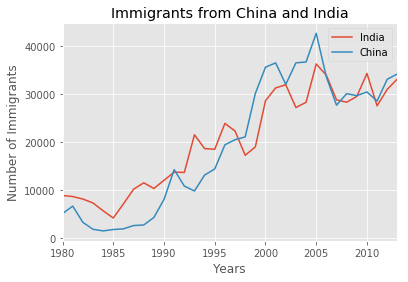

In [79]:
    df_CI.index = df_CI.index.map(int) # let's change the index values of df_CI to type integer for plotting
    df_CI.plot(kind='line')

    plt.title('Immigrants from China and India')
    plt.ylabel('Number of Immigrants')
    plt.xlabel('Years')

    plt.show()


*Note*: How come we didn't need to transpose Haiti's dataframe before plotting (like we did for df_CI)?
​
That's because `haiti` is a series as opposed to a dataframe, and has the years as its indices as shown below.
​
```python
print(type(haiti))
print(haiti.head(5))
```
​
> class 'pandas.core.series.Series' <br>
> 1980    1666 <br>
> 1981    3692 <br>
> 1982    3498 <br>
> 1983    2860 <br>
> 1984    1418 <br>
> Name: Haiti, dtype: int64 <br>
​


**Question:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.


      India  China  United Kingdom of Great Britain and Northern Ireland  \
1980   8880   5123                                              22045      
1981   8670   6682                                              24796      
1982   8147   3308                                              20620      
1983   7338   1863                                              10015      
1984   5704   1527                                              10170      
1985   4211   1816                                               9564      
1986   7150   1960                                               9470      
1987  10189   2643                                              21337      
1988  11522   2758                                              27359      
1989  10343   4323                                              23795      
1990  12041   8076                                              31668      
1991  13734  14255                                              23380      
1992  13673 

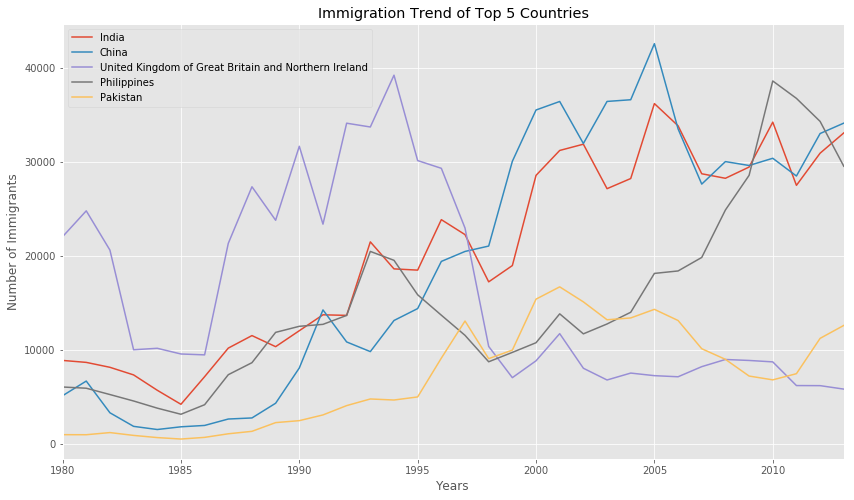

In [81]:
    #The correct answer is:    
    #Step 1: Get the dataset. Recall that we created a Total column that calculates cumulative immigration by country. 
    #We will sort on this column to get our top 5 countries using pandas sort_values() method.
    
    inplace = True # paramemter saves the changes to the original df_can dataframe
    data.sort_values(by='Total', ascending=False, axis=0, inplace=True)

    # get the top 5 entries
    df_top5 = data.head(5)

    # transpose the dataframe
    df_top5 = df_top5[years].transpose() 

    print(df_top5)


    #Step 2: Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
    df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
    df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size



    plt.title('Immigration Trend of Top 5 Countries')
    plt.ylabel('Number of Immigrants')
    plt.xlabel('Years')


    plt.show()

In [82]:
data1 = data

In [84]:
# let's examine the types of the column labels
all(isinstance(column, str) for column in data1.columns)

True

In [85]:
data1.columns = list(map(str, data1.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in data1.columns)

True

In [87]:
data1.head()


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [88]:
data1.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = data1.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


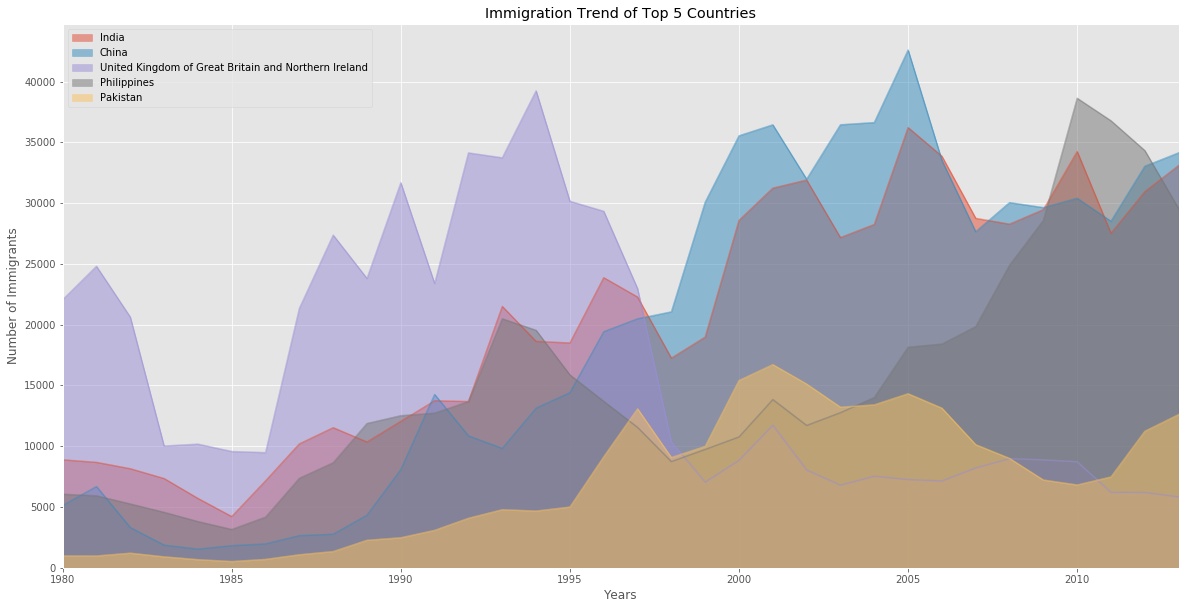

In [89]:
# let's change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the `alpha` parameter.

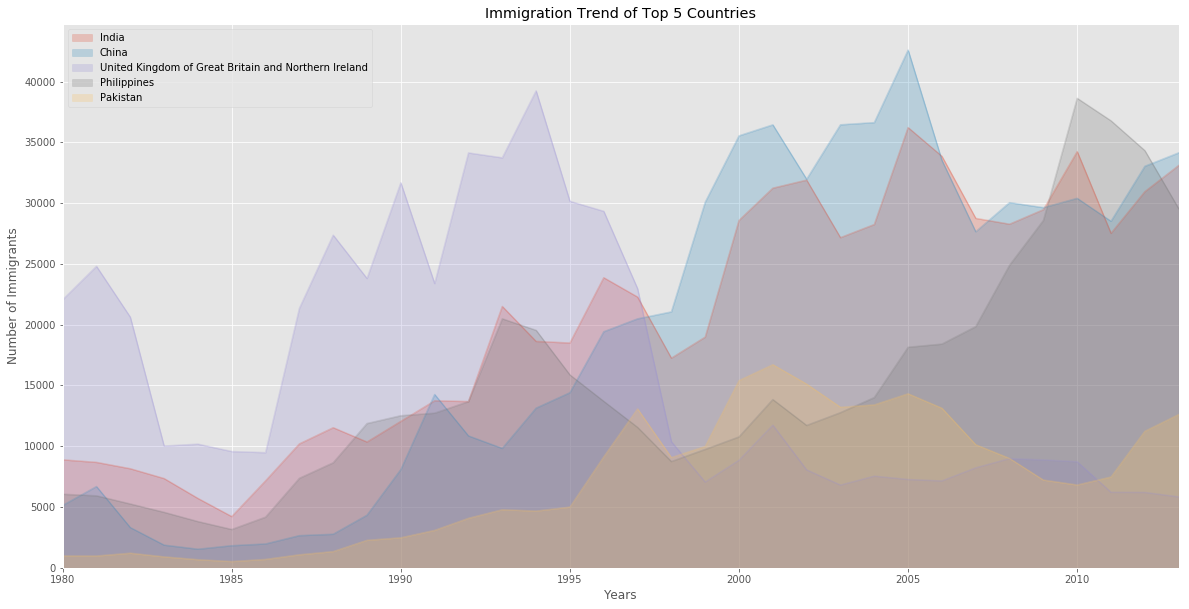

In [90]:
df_top5.plot(kind='area', 
             alpha=0.25,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Two types of plotting

As we discussed in the video lectures, there are two styles/options of plotting with `matplotlib`， plotting using the Artist layer and plotting using the scripting layer.

\*\*Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt' \*\*

You can use `plt` i.e. `matplotlib.pyplot` and add more elements by calling different methods procedurally; for example, `plt.title(...)` to add title or `plt.xlabel(...)` to add label to the x-axis.

```python
    # Option 1: This is what we have been using so far
    df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10)) 
    plt.title('Immigration trend of top 5 countries')
    plt.ylabel('Number of immigrants')
    plt.xlabel('Years')
```


\*\*Option 2: Artist layer (Object oriented method) - using an `Axes` instance from Matplotlib (preferred) \*\*

You can use an `Axes` instance of your current plot and store it in a variable (eg. `ax`). You can add more elements by calling methods with a little change in syntax (by adding "`set_`" to the previous methods). For example, use `ax.set_title()` instead of `plt.title()` to add title,  or `ax.set_xlabel()` instead of `plt.xlabel()` to add label to the x-axis.

This option sometimes is more transparent and flexible to use for advanced plots (in particular when having multiple plots, as you will see later).

In this course, we will stick to the **scripting layer**, except for some advanced visualizations where we will need to use the **artist layer** to manipulate advanced aspects of the plots.


Text(0.5, 0, 'Years')

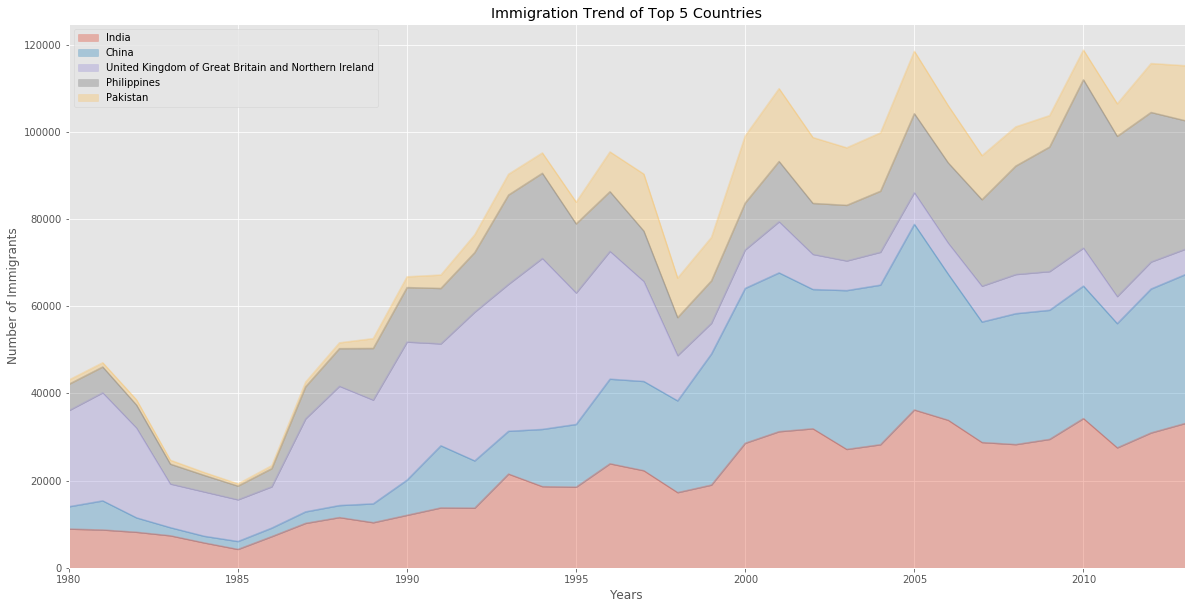

In [91]:
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

**Question**: Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.45.

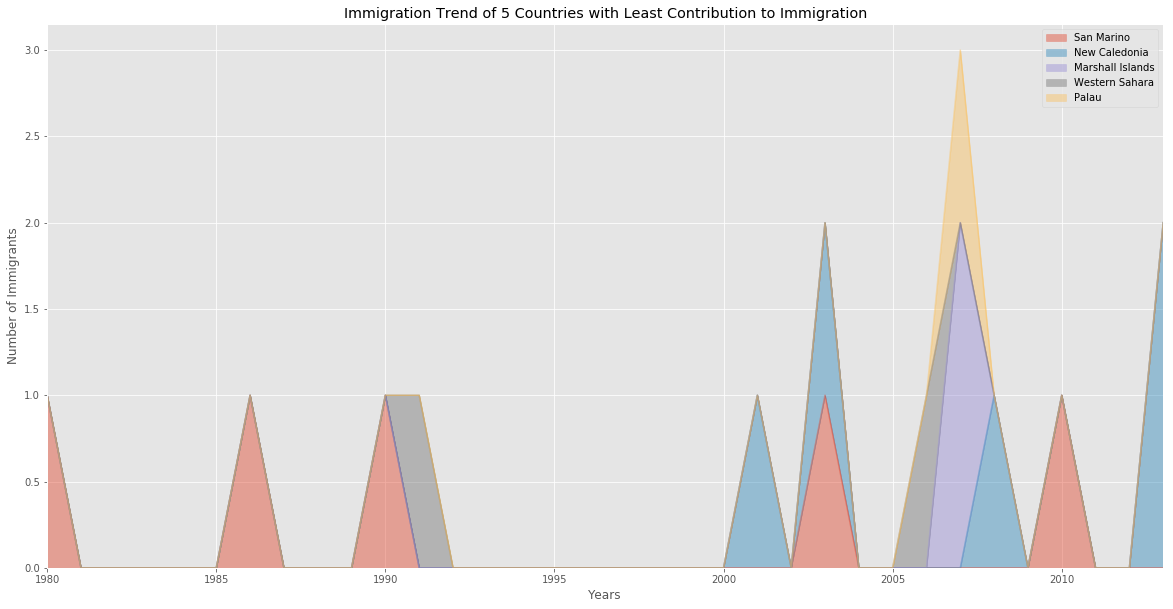

In [93]:
    #The correct answer is:
    # get the 5 countries with the least contribution
    df_least5 = data1.tail(5)
     
    # transpose the dataframe
    df_least5 = df_least5[years].transpose() 
    df_least5.head()

    df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
    df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10)) 

    plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
    plt.ylabel('Number of Immigrants')
    plt.xlabel('Years')

    plt.show()

Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.55.

Text(0.5, 0, 'Years')

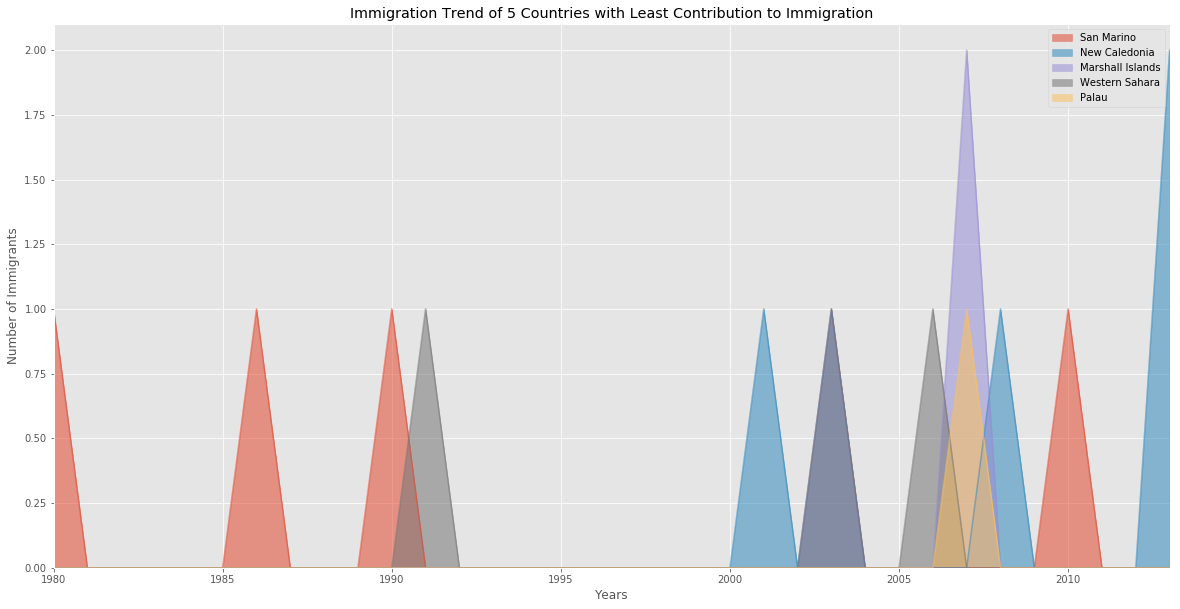

In [94]:
    #The correct answer is:
    
    # get the 5 countries with the least contribution
    df_least5 = data1.tail(5)

    # transpose the dataframe
    df_least5 = df_least5[years].transpose() 
    
    df_least5.head()

    df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
    
    ax = df_least5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))
    
    ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
    ax.set_ylabel('Number of Immigrants')
    ax.set_xlabel('Years')

# Histograms<a id="8"></a>

A histogram is a way of representing the *frequency* distribution of numeric dataset. The way it works is it partitions the x-axis into *bins*, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.


What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

In [95]:
# let's quickly view the 2013 data
data1['2013'].head()

India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [96]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(data1['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


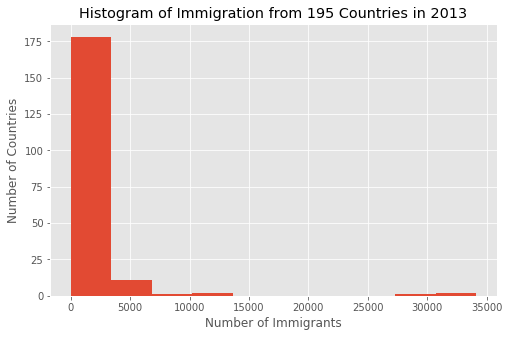

In [97]:
data1['2013'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of Immigration from 195 Countries in 2013')
# add y-label
plt.ylabel('Number of Countries')
# add x-label
plt.xlabel('Number of Immigrants')

plt.show()

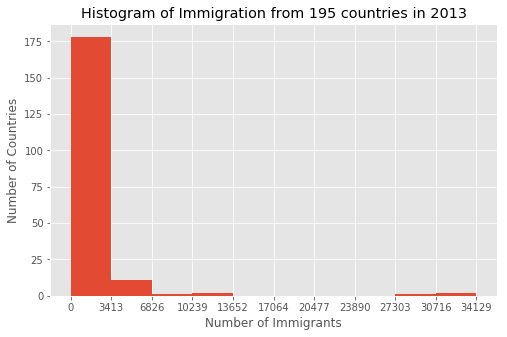

In [99]:
# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(data1['2013'])

data1['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

Question: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [100]:
# let's quickly view the dataset 
data1.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


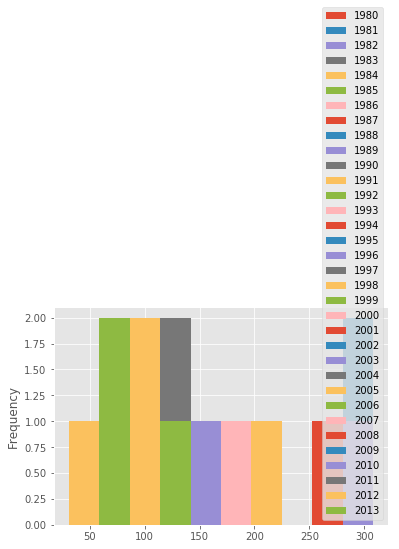

In [101]:
# generate histogram
data1.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

In [102]:
# transpose dataframe
df_t = data1.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


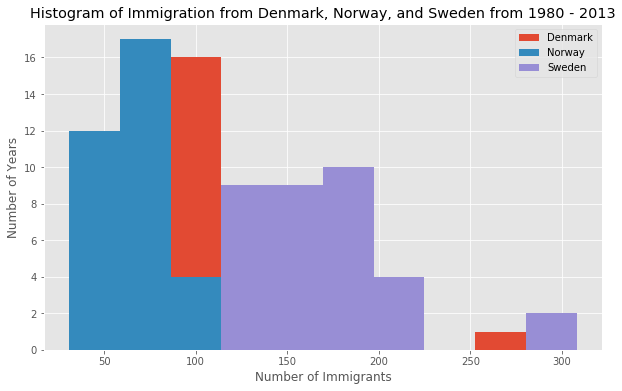

In [103]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

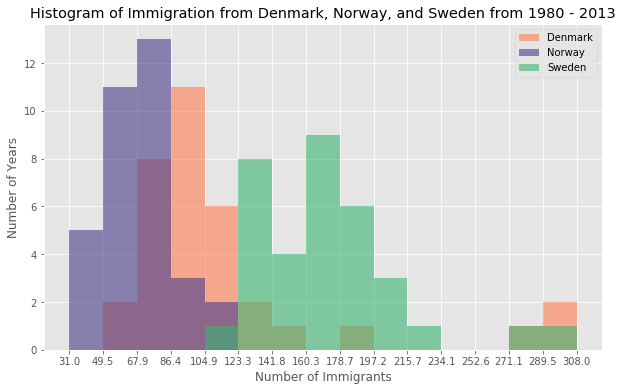

In [104]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

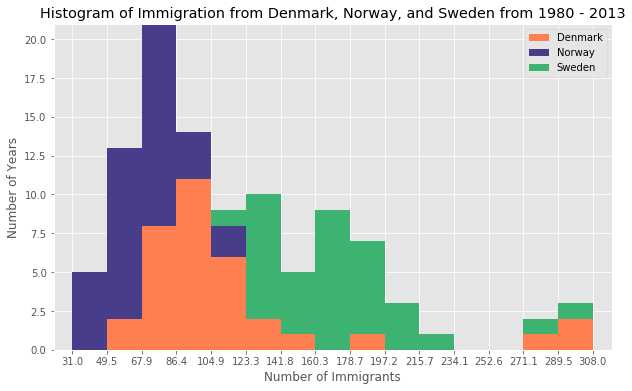

In [105]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

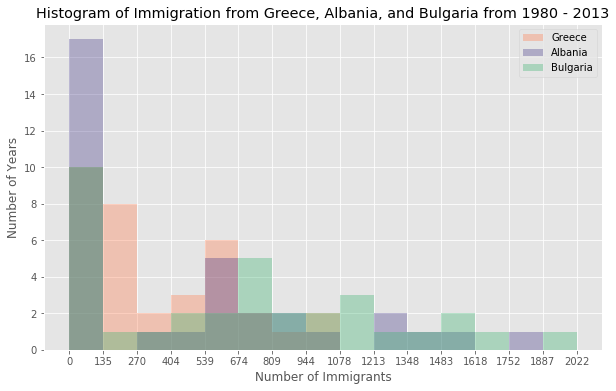

In [107]:
    #The correct answer is:
    
    # create a dataframe of the countries of interest (cof)
    df_cof = data1.loc[['Greece', 'Albania', 'Bulgaria'], years]

    # transpose the dataframe
    df_cof = df_cof.transpose() 

    # let's get the x-tick values
    count, bin_edges = np.histogram(df_cof, 15)

    # Un-stacked Histogram
    df_cof.plot(kind ='hist',
                figsize=(10, 6),
                bins=15,
                alpha=0.35,
                xticks=bin_edges,
                color=['coral', 'darkslateblue', 'mediumseagreen']
                )

    plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
    plt.ylabel('Number of Years')
    plt.xlabel('Number of Immigrants')

    plt.show()

# Bar Charts (Dataframe) <a id="10"></a>

A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals.

To create a bar plot, we can pass one of two arguments via `kind` parameter in `plot()`:

*   `kind=bar` creates a *vertical* bar plot
*   `kind=barh` creates a *horizontal* bar plot


In [108]:
# step 1: get the data
df_iceland = data1.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

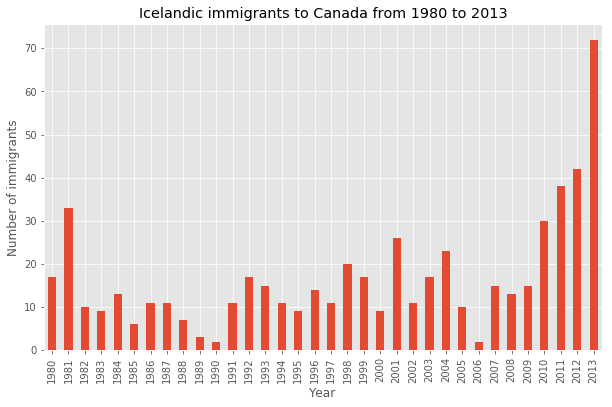

In [109]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

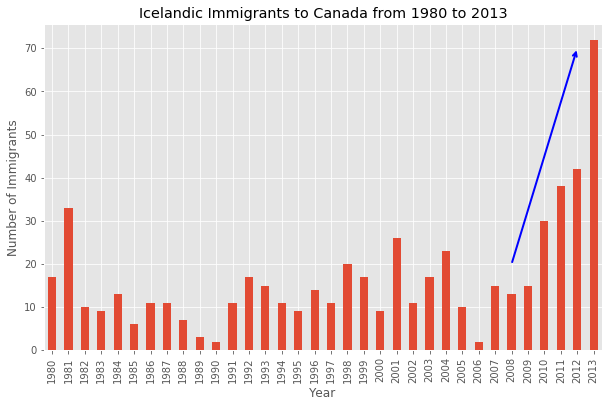

In [110]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

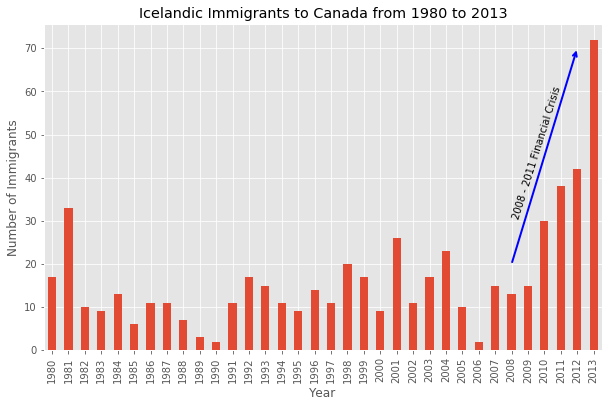

In [111]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

In [115]:
    #The correct answer is:
    
    # sort dataframe on 'Total' column (descending)
    data1.sort_values(by='Total', ascending=True, inplace=True)

    # get top 15 data1
    df_top15 = data1['Total'].tail(15)
    df_top15

Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

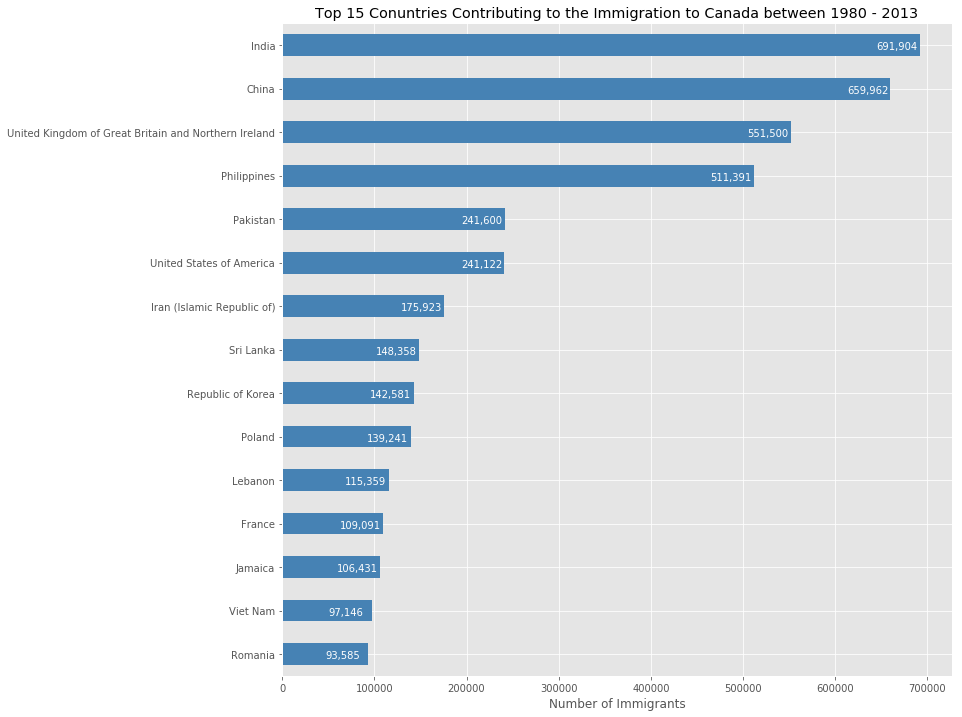

In [116]:
    #The correct answer is:
    
    # generate plot
    df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
    plt.xlabel('Number of Immigrants')
    plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

    # annotate value labels to each country
    for index, value in enumerate(df_top15): 
        label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
        plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

    plt.show()

In [ ]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

# Pie Charts <a id="6"></a>

A `pie chart` is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. You are most likely already familiar with pie charts as it is widely used in business and media. We can create pie charts in Matplotlib by passing in the `kind=pie` keyword.

Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.


Step 1: Gather data.

We will use *pandas* `groupby` method to summarize the immigration data by `Continent`. The general process of `groupby` involves the following steps:

1.  **Split:** Splitting the data into groups based on some criteria.
2.  **Apply:** Applying a function to each group independently:
    .sum()
    .count()
    .mean()
    .std()
    .aggregate()
    .apply()
    .etc..
3.  **Combine:** Combining the results into a data structure.


<img src="split.png" height=400 align="center">

In [120]:
# group countries by continents and apply sum() function 
df_continents = data.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(data.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


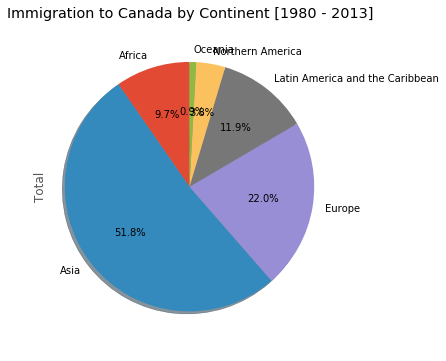

In [121]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

The above visual is not very clear, the numbers and text overlap in some instances. Let's make a few modifications to improve the visuals:

*   Remove the text labels on the pie chart by passing in `legend` and add it as a seperate legend using `plt.legend()`.
*   Push out the percentages to sit just outside the pie chart by passing in `pctdistance` parameter.
*   Pass in a custom set of colors for continents by passing in `colors` parameter.
*   **Explode** the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Caribbean) by passing in `explode` parameter.


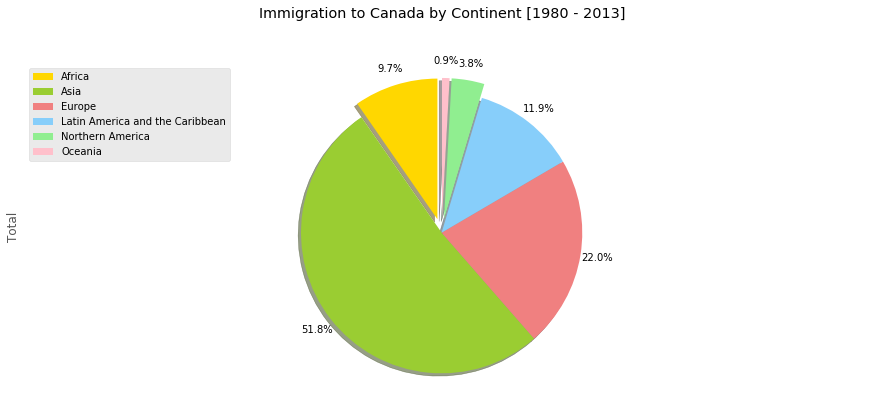

In [122]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

Question: Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

Note: You might need to play with the explore values in order to fix any overlapping slice values.

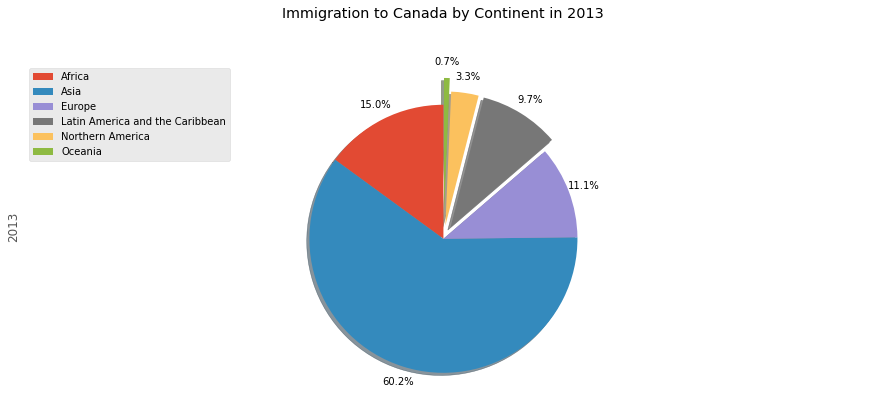

In [123]:
    #The correct answer is:
    explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

    df_continents['2013'].plot(kind='pie',
                                figsize=(15, 6),
                                autopct='%1.1f%%', 
                                startangle=90,    
                                shadow=True,       
                                labels=None,                 # turn off labels on pie chart
                                pctdistance=1.12,            # the ratio between the pie center and start of text label
                                explode=explode_list         # 'explode' lowest 3 continents
                                )

    # scale the title up by 12% to match pctdistance
    plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
    plt.axis('equal') 

    # add legend
    plt.legend(labels=df_continents.index, loc='upper left') 

    # show plot
    plt.show()

# Box Plots <a id="8"></a>

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions:

*   **Minimum:** The smallest number in the dataset excluding the outliers.
*   **First quartile:** Middle number between the `minimum` and the `median`.
*   **Second quartile (Median):** Middle number of the (sorted) dataset.
*   **Third quartile:** Middle number between `median` and `maximum`.
*   **Maximum:** The largest number in the dataset excluding the outliers.


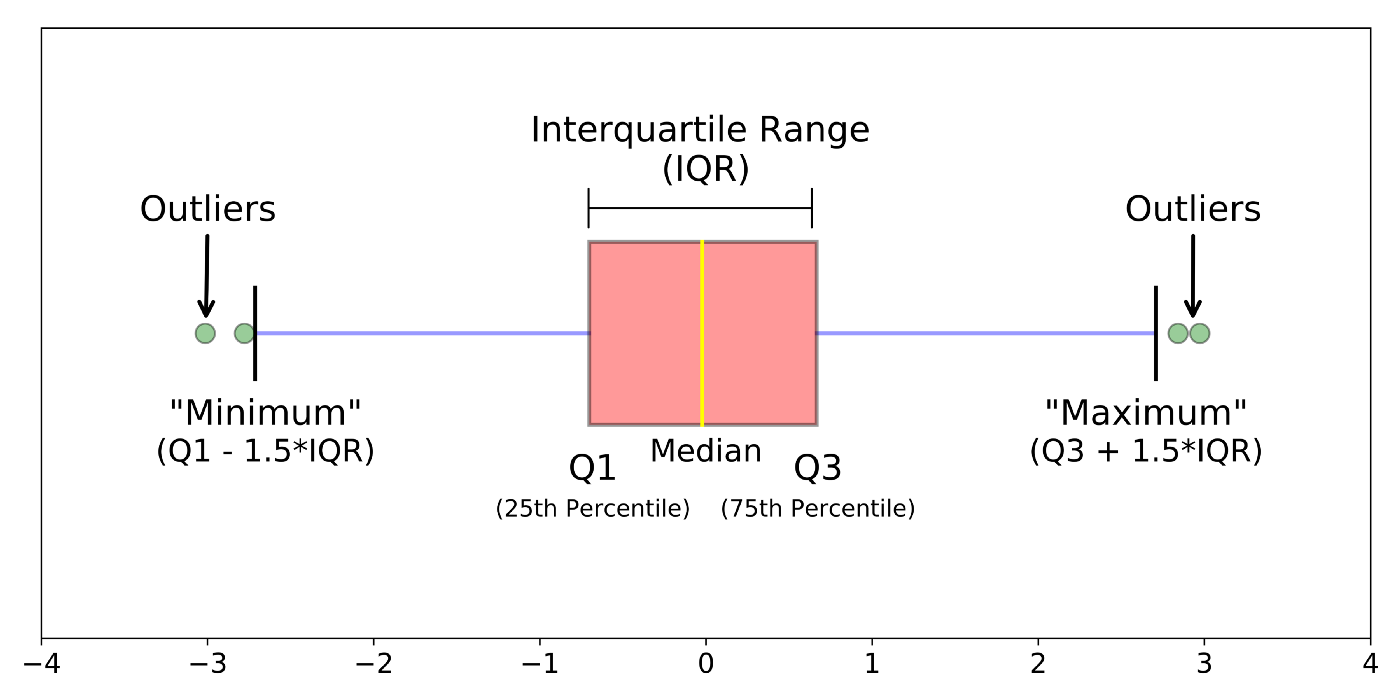

To make a `boxplot`, we can use `kind=box` in `plot` method invoked on a *pandas* series or dataframe.

Let's plot the box plot for the Japanese immigrants between 1980 - 2013.

Step 1: Get the subset of the dataset. Even though we are extracting the data for just one country, we will obtain it as a dataframe. This will help us with calling the `dataframe.describe()` method to view the percentiles.


In [130]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = data.loc[['Japan'], years].transpose()
df_japan.head()

,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


Step 2: Plot by passing in `kind='box'`.

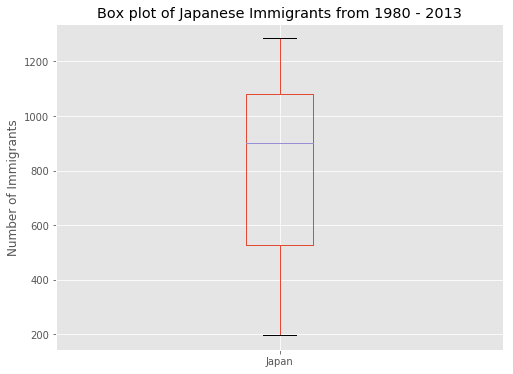

In [132]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

We can immediately make a few key observations from the plot above:

1.  The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and  median number of immigrants is around 900 (median).
2.  25% of the years for period 1980 - 2013 had an annual immigrant count of \~500 or fewer (First quartile).
3.  75% of the years for period 1980 - 2013 had an annual immigrant count of \~1100 or fewer (Third quartile).

We can view the actual numbers by calling the `describe()` method on the dataframe.


In [133]:
df_japan.describe()

,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


One of the key benefits of box plots is comparing the distribution of multiple datasets. In one of the previous labs, we observed that China and India had very similar immigration trends. Let's analyze these two countries further using box plots.

**Question:** Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.


Step 1: Get the dataset for China and India and call the dataframe **df_CI**.


In [135]:
    #The correct answer is:
    df_CI= data.loc[['China', 'India'], years].transpose()
    df_CI.head()

,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


In [136]:
    df_CI.describe()

,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


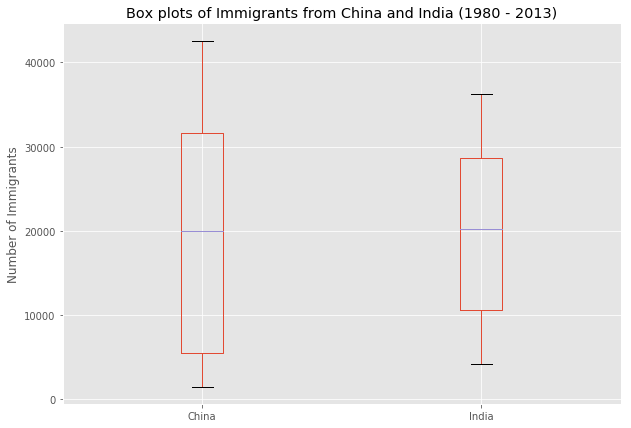

In [137]:
    df_CI.plot(kind='box', figsize=(10, 7))

    plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
    plt.ylabel('Number of Immigrants')

    plt.show()

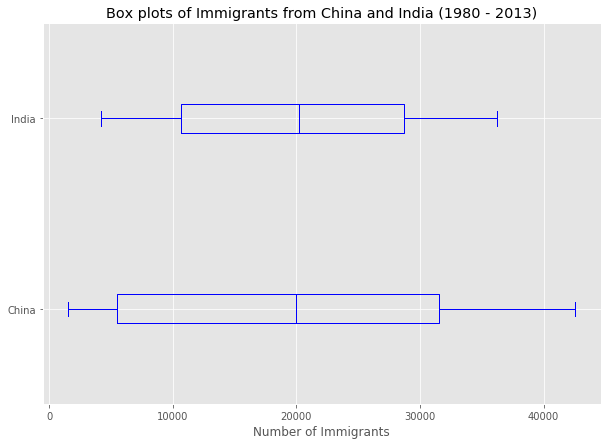

In [138]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')

plt.show()

**Subplots**

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**.

Typical syntax is : <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Where

*   `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,
*   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` \* `ncols` as shown below.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig5Subplots_V2.png" width=500 align="center">


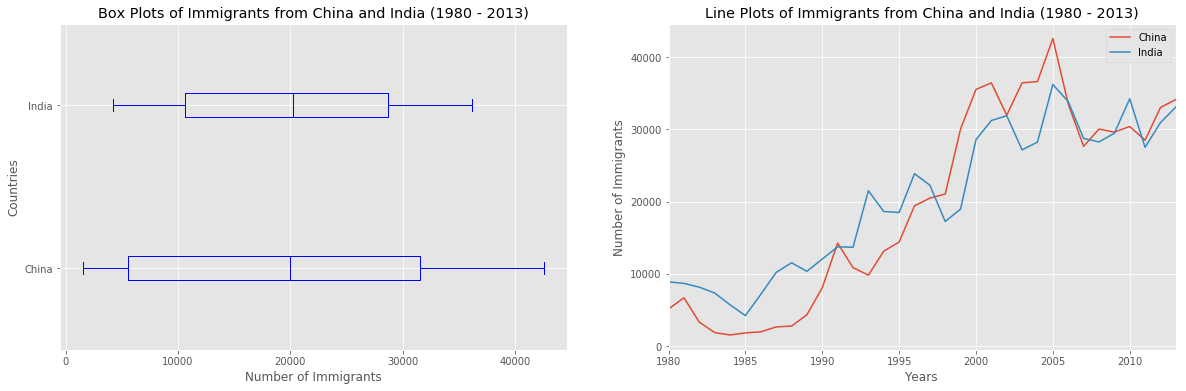

In [139]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

Let's try something a little more advanced.

Previously we identified the top 15 countries based on total immigration from 1980 - 2013.

**Question:** Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the *decades* `1980s`, `1990s`, and `2000s`.


In [141]:
    df_top15 = data.sort_values(['Total'], ascending=False, axis=0).head(15)
    df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581
Poland,Europe,Eastern Europe,Developed regions,863,2930,5881,4546,3588,2819,4808,...,1405,1263,1235,1267,1013,795,720,779,852,139241


Step 2: Create a new dataframe which contains the aggregate for each decade. One way to do that:

1.  Create a list of all years in decades 80's, 90's, and 00's.
2.  Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
3.  Merge the three series into a new data frame. Call your dataframe **new_df**.


In [142]:
### type your answer here


#The correct answer is:

# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

# display dataframe
new_df.head()

,1980s,1990s,2000s
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [143]:
    #The correct answer is:
    
    # create a list of all years in decades 80's, 90's, and 00's
    years_80s = list(map(str, range(1980, 1990))) 
    years_90s = list(map(str, range(1990, 2000))) 
    years_00s = list(map(str, range(2000, 2010))) 

    # slice the original dataframe df_can to create a series for each decade
    df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
    df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
    df_00s = df_top15.loc[:, years_00s].sum(axis=1)

    # merge the three series into a new data frame
    new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

    # display dataframe
    new_df.head()

,1980s,1990s,2000s
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [144]:
    new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


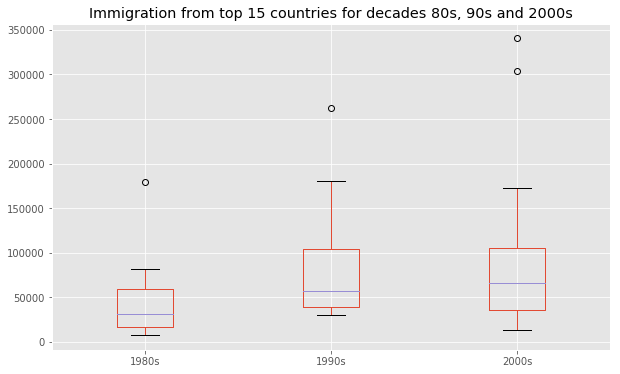

In [145]:
    new_df.plot(kind='box', figsize=(10, 6))

    plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')

    plt.show()

Note how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:<br>

*   larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
*   smaller than Q1 by at least 1.5 times the IQR.

Let's look at decade 2000s as an example: <br>

*   Q1 (25%) = 36,101.5 <br>
*   Q3 (75%) = 105,505.5 <br>
*   IQR = Q3 - Q1 = 69,404 <br>

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

Outlier > 105,505.5 + (1.5 \* 69,404) <br>
Outlier > 209,611.5


In [146]:
    new_df=new_df.reset_index()
    new_df[new_df['2000s']> 209611.5]

,index,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


China and India are both considered as outliers since their population for the decade exceeds 209,611.5.

The box plot is an advanced visualizaiton tool, and there are many options and customizations that exceed the scope of this lab. Please refer to [Matplotlib documentation](http://matplotlib.org/api/pyplot_api.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01#matplotlib.pyplot.boxplot) on box plots for more information.


# Scatter Plots <a id="10"></a>

A `scatter plot` (2D) is a useful method of comparing variables against each other. `Scatter` plots look similar to `line plots` in that they both map independent and dependent variables on a 2D graph. While the data points are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

Let's start by exploring the following:

Using a `scatter plot`, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.


Step 1: Get the dataset. Since we are expecting to use the relationship betewen `years` and `total population`, we will convert `years` to `int` type.

In [148]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(data[years].sum(axis=0))

# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


Step 2: Plot the data. In `Matplotlib`, we can create a `scatter` plot set by passing in `kind='scatter'` as plot argument. We will also need to pass in `x` and `y` keywords to specify the columns that go on the x- and the y-axis.

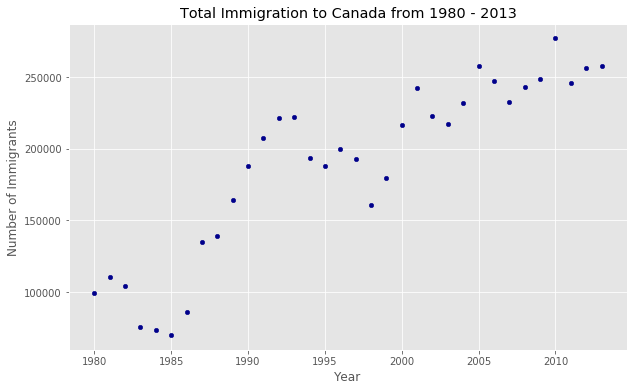

In [149]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

So let's try to plot a linear line of best fit, and use it to  predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit. We will use **Numpy**'s `polyfit()` method by passing in the following:

*   `x`: x-coordinates of the data.
*   `y`: y-coordinates of the data.
*   `deg`: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.


In [150]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

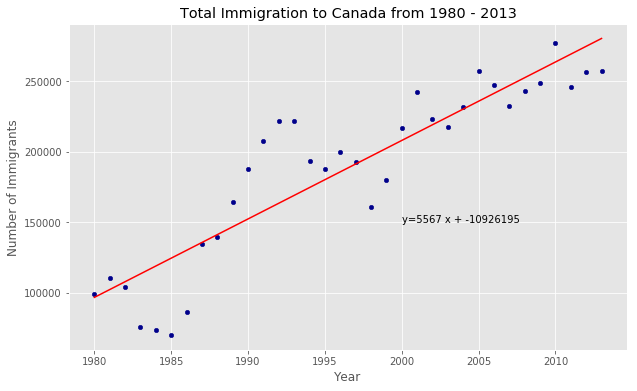

'No. Immigrants = 5567 * Year + -10926195'

In [151]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

Using the equation of line of best fit, we can estimate the number of immigrants in 2015:

```python
No. Immigrants = 5567 * Year - 10926195
No. Immigrants = 5567 * 2015 - 10926195
No. Immigrants = 291,310
```

When compared to the actual from Citizenship and Immigration Canada's (CIC) [2016 Annual Report](http://www.cic.gc.ca/english/resources/publications/annual-report-2016/index.asp?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01), we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

As a side note, we can observe that immigration took a dip around 1993 - 1997. Further analysis into the topic revealed that in 1993 Canada introcuded Bill C-86 which introduced revisions to the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship required for "assisted relatives" and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years.


**Question**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?


**Step 1**: Get the data:

1.  Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it **df_countries**.
2.  Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe **df_total**.
3.  Reset the index in place.
4.  Rename the columns to **year** and **total**.
5.  Display the resulting dataframe.


In [154]:
    #The correct answer is:  
    
    # create df_countries dataframe
    df_countries = data.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

    # create df_total by summing across three countries for each year
    df_total = pd.DataFrame(df_countries.sum(axis=1))

    # reset index in place
    df_total.reset_index(inplace=True)

    # rename columns
    df_total.columns = ['year', 'total']

    # change column year from string to int to create scatter plot
    df_total['year'] = df_total['year'].astype(int)

    # show resulting dataframe
    df_total.head()


,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


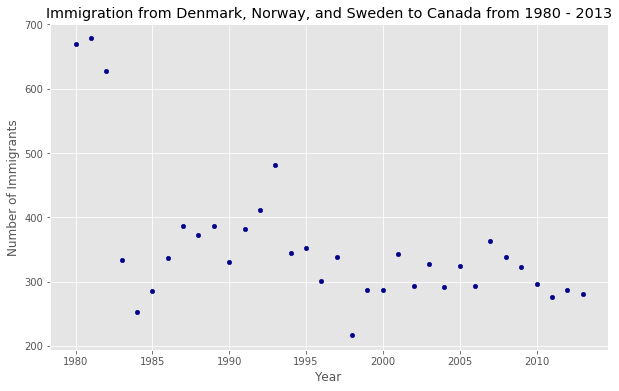

In [155]:
    
    # generate scatter plot
    df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

    # add title and label to axes
    plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
    plt.xlabel('Year')
    plt.ylabel('Number of Immigrants')

    # show plot
    plt.show()

# Bubble Plots <a id="12"></a>

A `bubble plot` is a variation of the `scatter plot` that displays three dimensions of data (x, y, z). The data points are replaced with bubbles, and the size of the bubble is determined by the third variable `z`, also known as the weight. In `maplotlib`, we can pass in an array or scalar to the parameter `s` to `plot()`, that contains the weight of each point.

**Let's start by analyzing the effect of Argentina's great depression**.

Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a `bubble plot` of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the *normalized* value of the population for each year.


**Step 1**: Get the data for Brazil and Argentina. Like in the previous example, we will convert the `Years` to type int and include it in the dataframe.


In [156]:
# transposed dataframe
df_can_t = data[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

,Year,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,...,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,0,1,0,0,0,0,...,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,...,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,...,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,...,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,1,0,0,...,3588,847,1086,1977,6661,668,3801,10170,1527,5704


**Step 2**: Create the normalized weights.

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) to bring all values into the range \[0, 1]. The general formula is:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig3FeatureScaling.png" align="center">

where $X$ is the original value, $X'$ is the corresponding normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the data points are scaled to a value between 0-1 accordingly.


In [158]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

**Step 3**: Plot the data.

*   To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter.
*   We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore, we will:
    *   multiply weights by 2000 to scale it up on the graph, and,
    *   add 10 to compensate for the min value (which has a 0 weight and therefore scale with $\times 2000$).


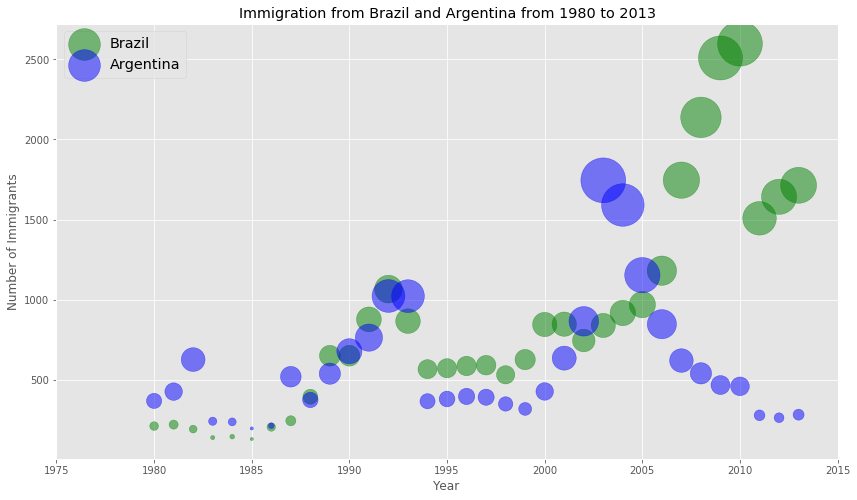

In [159]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

**Question**: Previously in this lab, we created box plots to compare immigration from China and India to Canada. Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. You can use **df_can_t** that we defined and used in the previous example.

In [160]:
    # normalized Chinese data
    norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
    # normalized Indian data
    norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

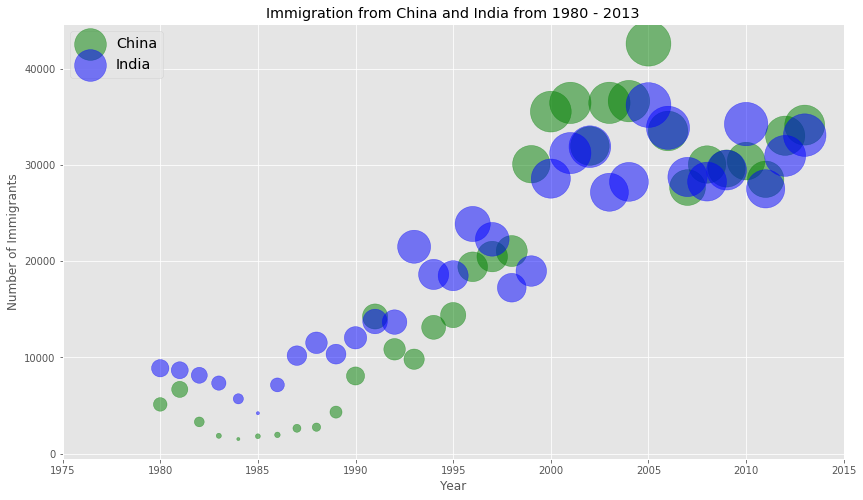

In [161]:
    # China
    ax0 = df_can_t.plot(kind='scatter',
                        x='Year',
                        y='China',
                        figsize=(14, 8),
                        alpha=0.5,                  # transparency
                        color='green',
                        s=norm_china * 2000 + 10,  # pass in weights 
                        xlim=(1975, 2015)
                       )

    # India
    ax1 = df_can_t.plot(kind='scatter',
                        x='Year',
                        y='India',
                        alpha=0.5,
                        color="blue",
                        s=norm_india * 2000 + 10,
                        ax = ax0
                       )

    ax0.set_ylabel('Number of Immigrants')
    ax0.set_title('Immigration from China and India from 1980 - 2013')
    ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

In [163]:
! pip install seaborn

# import library
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


In [164]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(data[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


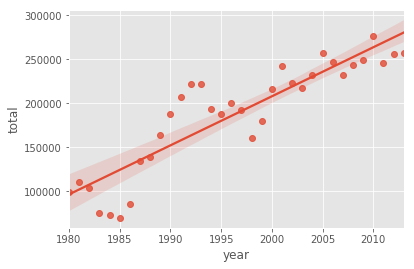

In [165]:
sns.regplot(x='year', y='total', data=df_tot)

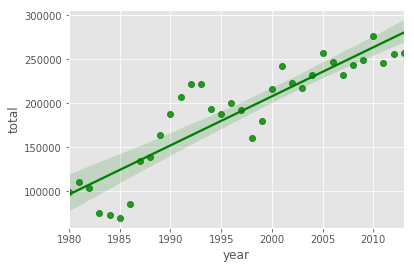

In [166]:
sns.regplot(x='year', y='total', data=df_tot, color='green')
plt.show()

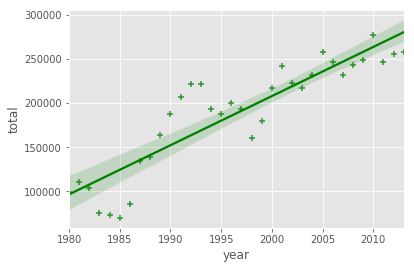

In [167]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')
plt.show()

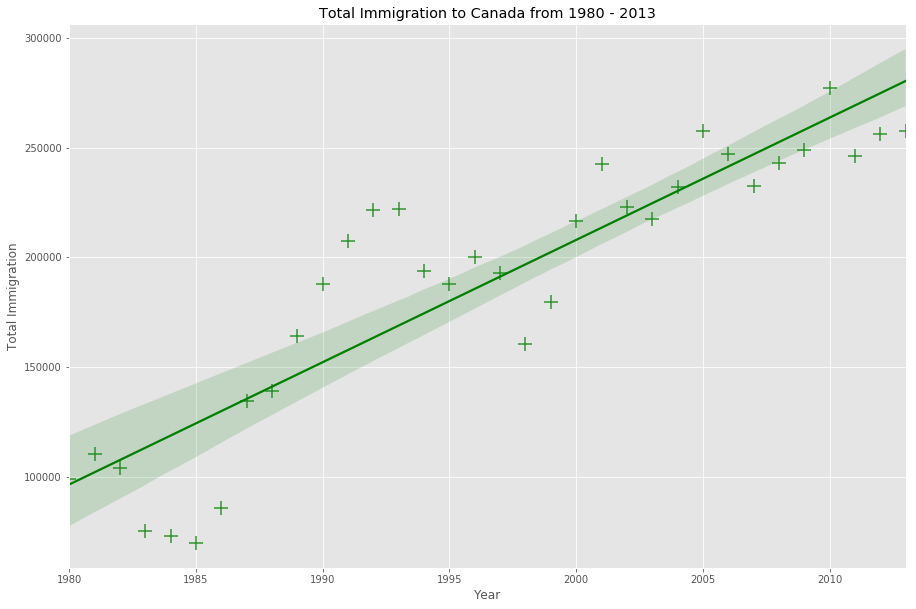

In [168]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title
plt.show()

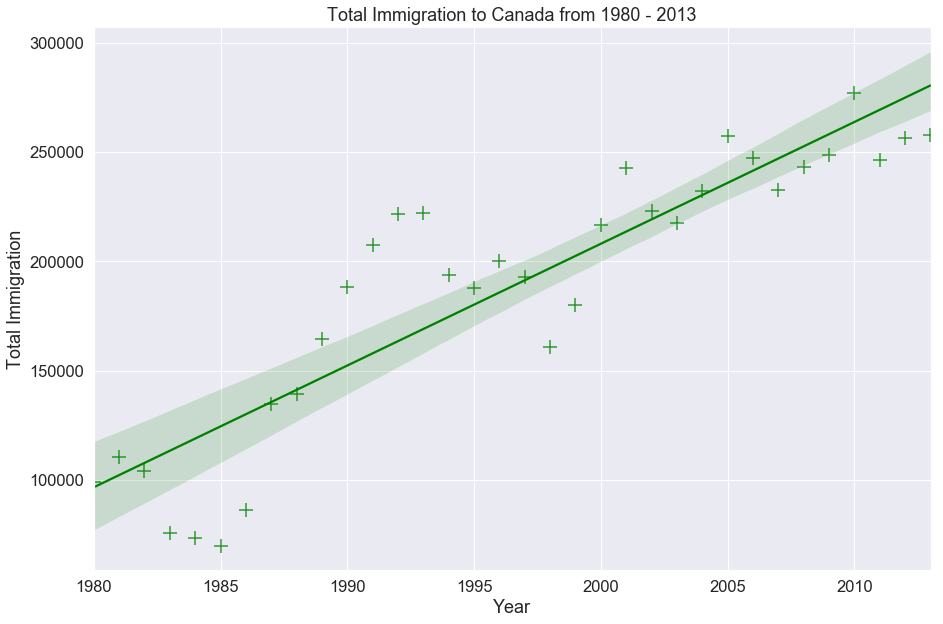

In [169]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

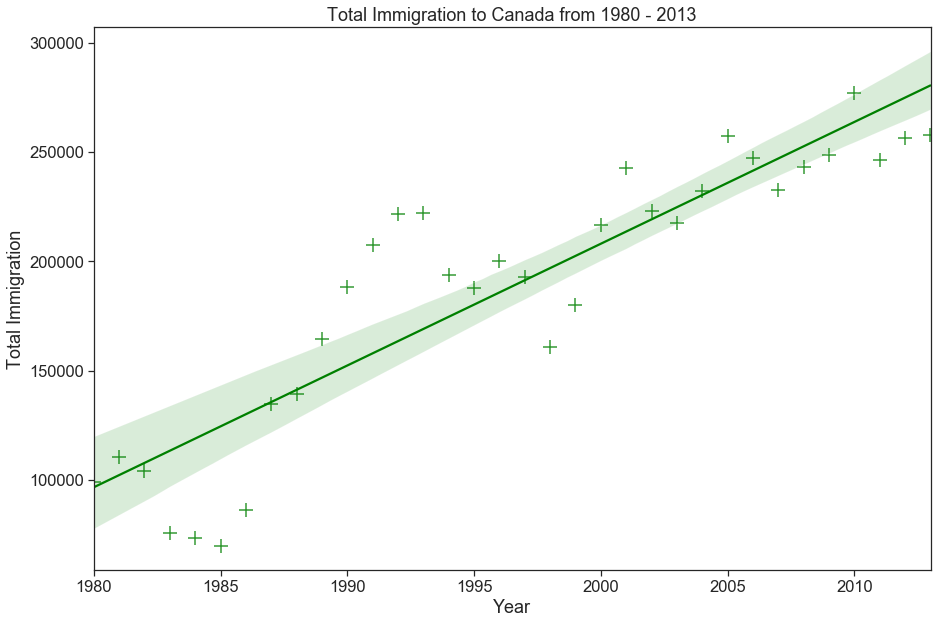

In [170]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('ticks')  # change background to white background

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

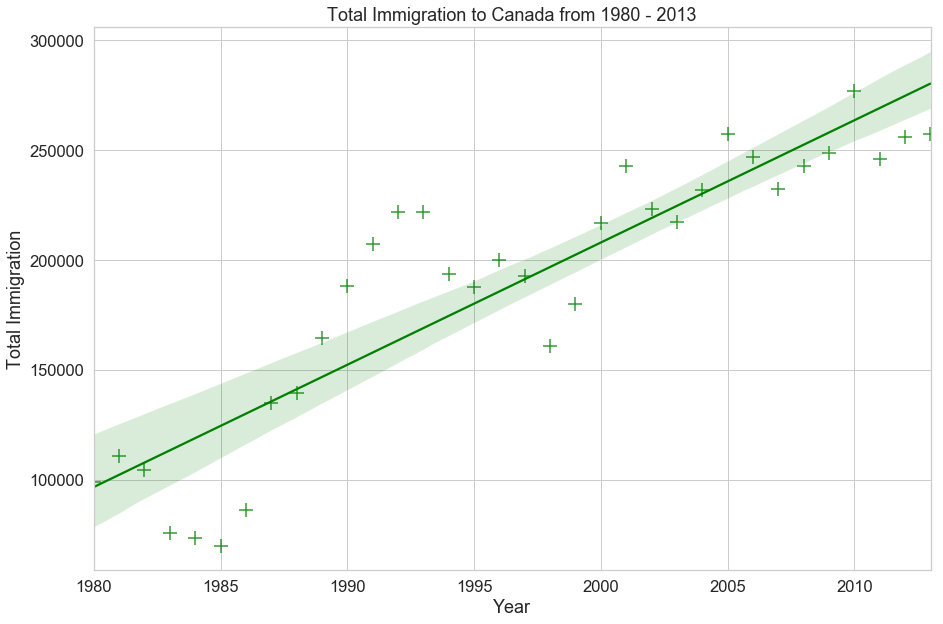

In [171]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

Text(0.5, 1.0, 'Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

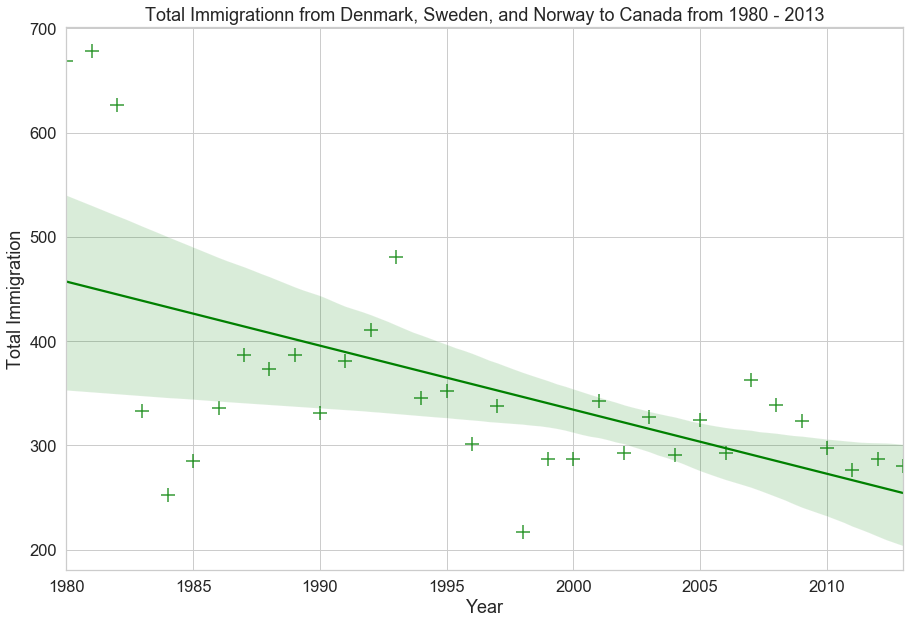

In [173]:
    # create df_countries dataframe
    df_countries = data.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

    # create df_total by summing across three countries for each year
    df_total = pd.DataFrame(df_countries.sum(axis=1))

    # reset index in place
    df_total.reset_index(inplace=True)

    # rename columns
    df_total.columns = ['year', 'total']

    # change column year from string to int to create scatter plot
    df_total['year'] = df_total['year'].astype(int)

    # define figure size
    plt.figure(figsize=(15, 10))

    # define background style and font size
    sns.set(font_scale=1.5)
    sns.set_style('whitegrid')

    # generate plot and add title and axes labels
    ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
    ax.set(xlabel='Year', ylabel='Total Immigration')
    ax.set_title('Total Immigrationn from Denmark, Sweden, and Norway to Canada from 1980 - 2013')


Strictly speaking a 95% confidence interval means that if we were to take 100 different samples and compute a 95% confidence interval for each sample, then approximately 95 of the 100 confidence intervals will contain the true mean value (μ).